In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import zipfile
import json

In [2]:
zf = zipfile.ZipFile('all_data.zip')
q1_df = pd.read_csv(zf.open('Q12019.csv'))
q2_df = pd.read_csv(zf.open('Q22019.csv'))
q3_df = pd.read_csv(zf.open('Q32019.csv'))
q4_df = pd.read_csv(zf.open('Q42019.csv'))

In [21]:
q1_df.head()

,YEAR,QUARTER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_STATE_ABR,DEST_STATE_NM,PASSENGERS,Unnamed: 9
0,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0,NaN
1,2019,1,RIC,VA,Virginia,CLT,NC,North Carolina,1.0,NaN
2,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0,NaN
3,2019,1,RIC,VA,Virginia,CLT,NC,North Carolina,1.0,NaN
4,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0,NaN


In [22]:
q1_df.ORIGIN_STATE_NM.value_counts()

California                                        777698
Florida                                           757173
Texas                                             539946
New York                                          326195
Virginia                                          232079
Illinois                                          226679
Colorado                                          205435
North Carolina                                    197011
Georgia                                           186959
Arizona                                           185340
Nevada                                            180804
Washington                                        179975
Pennsylvania                                      174227
Michigan                                          148961
Tennessee                                         135915
Massachusetts                                     133538
Missouri                                          132157
Minnesota                      

In [23]:
q1_df.DEST_STATE_NM.value_counts()

California                                        780524
Florida                                           750082
Texas                                             534965
New York                                          330258
Virginia                                          234205
Illinois                                          225007
Colorado                                          201999
North Carolina                                    194305
Georgia                                           185576
Arizona                                           183215
Washington                                        181800
Nevada                                            178034
Pennsylvania                                      175500
Michigan                                          148465
Tennessee                                         136640
Massachusetts                                     135997
Missouri                                          134058
New Jersey                     

In [24]:
cali_dest = q1_df[q1_df["DEST_STATE_NM"] == 'California']

In [25]:
cali_dest

,YEAR,QUARTER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_STATE_ABR,DEST_STATE_NM,PASSENGERS,Unnamed: 9
841,2019,1,CLT,NC,North Carolina,SAN,CA,California,2.0,NaN
842,2019,1,CLT,NC,North Carolina,SAN,CA,California,4.0,NaN
843,2019,1,CLT,NC,North Carolina,SAN,CA,California,1.0,NaN
844,2019,1,CLT,NC,North Carolina,SAN,CA,California,9.0,NaN
845,2019,1,CLT,NC,North Carolina,SAN,CA,California,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6508626,2019,1,SAT,TX,Texas,SNA,CA,California,1.0,NaN
6508628,2019,1,SAT,TX,Texas,SNA,CA,California,1.0,NaN
6508630,2019,1,SAT,TX,Texas,SNA,CA,California,1.0,NaN
6508632,2019,1,SAT,TX,Texas,SNA,CA,California,1.0,NaN


In [26]:
# number of passengers from Cali per deestination state in Q1

cali_count_pass = cali_dest.groupby('ORIGIN_STATE_NM').count()['PASSENGERS']

cali_pass = pd.DataFrame({
    'Total Passengers': cali_count_pass
})

In [27]:
cali_pass

,Total Passengers
ORIGIN_STATE_NM,
Alabama,4484
Alaska,3764
Arizona,25549
Arkansas,3664
California,83895
Colorado,27402
Connecticut,4352
Florida,56438
Georgia,19110


In [3]:
# I ran a quick cleaning code.  I used the str() conatins method as it logically makes the most sense to me.  
# I tried various way to do both in the same line of code but I couldn't get it to work
df_cleanQ1 = q1_df[~q1_df.DEST_STATE_NM.str.contains("U.S.")][~q1_df.DEST_STATE_NM.str.contains("Rico")][~q1_df.ORIGIN_STATE_NM.str.contains("U.S.")][~q1_df.ORIGIN_STATE_NM.str.contains("Rico")]
df_cleanQ1.head()
# Verifying the cleaning
df_cleanQ1.DEST_STATE_NM.value_counts()

C:\Users\Nwyfre Cosplay\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


California        777182
Florida           740510
Texas             530507
New York          324471
Virginia          231475
Illinois          222279
Colorado          200776
North Carolina    192636
Georgia           183690
Arizona           182494
Washington        181093
Nevada            177327
Pennsylvania      173292
Michigan          146930
Tennessee         135724
Massachusetts     133178
Missouri          132839
Ohio              125101
New Jersey        124821
Minnesota         124560
Hawaii            121594
Oregon            109450
Utah              102400
Louisiana          99809
Kentucky           85634
Wisconsin          76830
Indiana            73286
South Carolina     73148
Maryland           72351
Oklahoma           52502
Alabama            45354
Connecticut        42452
Nebraska           38185
Montana            36393
Idaho              35639
Alaska             35012
New Mexico         34803
Iowa               33445
Arkansas           31936
Rhode Island       23843


In [4]:
df_cleanQ1.ORIGIN_STATE_NM.value_counts()

California        774519
Florida           747902
Texas             535638
New York          320632
Virginia          229349
Illinois          224055
Colorado          204205
North Carolina    195321
Georgia           185097
Arizona           184645
Nevada            180051
Washington        179280
Pennsylvania      172137
Michigan          147436
Tennessee         135009
Missouri          130981
Massachusetts     130883
Minnesota         125105
Hawaii            124341
Ohio              123518
New Jersey        122239
Oregon            107910
Utah              103965
Louisiana          99681
Kentucky           85320
Wisconsin          75588
Indiana            72782
South Carolina     72572
Maryland           71275
Oklahoma           51432
Alabama            44846
Connecticut        41819
Nebraska           37510
Montana            36834
Idaho              35404
New Mexico         34921
Alaska             33577
Iowa               32925
Arkansas           31574
Rhode Island       23334


In [5]:
#Removing useless column from dataframe
Cleanest_DF = df_cleanQ1[['YEAR', 
                          'QUARTER', 
                          'ORIGIN', 
                          'ORIGIN_STATE_ABR', 
                          'ORIGIN_STATE_NM',
                          'DEST', 
                          'DEST_STATE_ABR', 
                          'DEST_STATE_NM', 
                          'PASSENGERS']]

#Cleaning up the headers for each column

Cleanest_DF = Cleanest_DF.rename(columns={'YEAR': 'Year', 
                                          'QUARTER': 'Quarter', 
                                          'ORIGIN_STATE_ABR': 'Abreviated State Name', 
                                          'ORIGIN_STATE_NM': 'State Name', 
                                          'DEST': 'Destination',
                                          'DEST_STATE_NM': 'State Destination',
                                          'DEST_STATE_ABR': 'Abreviated State Destination', 
                                          'PASSENGERS': 'Passengers'})
Cleanest_DF.head()

,Year,Quarter,ORIGIN,Abreviated State Name,State Name,Destination,Abreviated State Destination,State Destination,Passengers
0,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0
1,2019,1,RIC,VA,Virginia,CLT,NC,North Carolina,1.0
2,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0
3,2019,1,RIC,VA,Virginia,CLT,NC,North Carolina,1.0
4,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0


In [6]:
q1_count_pass_airport = Cleanest_DF.groupby('Destination').count()['Passengers']

q1_pass_airport = pd.DataFrame({
    'Q1 Total Passengers': q1_count_pass_airport
})

q1_count_pass_state = Cleanest_DF.groupby('State Name').count()['Passengers']

q1_pass_state = pd.DataFrame({
    'Q1 Total Passengers': q1_count_pass_state
})

In [24]:
#get q1 most passengers by state

q1_pass_state.nlargest(5, 'Q1 Total Passengers')

,Q1 Total Passengers
State Name,
California,774519
Florida,747902
Texas,535638
New York,320632
Virginia,229349


In [33]:
#reset index to get state name
q1_pass_state = q1_pass_state.reset_index()

In [36]:
#get top5 states based on ['Passenger']
q1_pass_state_top5 = q1_pass_state.nlargest(5, 'Q1 Total Passengers')

<BarContainer object of 5 artists>

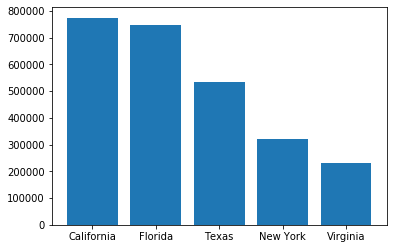

In [53]:


plt.bar(q1_pass_state_top5['State Name'], q1_pass_state_top5['Q1 Total Passengers'])

In [44]:
#trying to get list of states to compare to clean_df to get airports in those states to get passenger data broken down byrelevant airports
q1_pass_state_top5['State Name']
q1_pass_state_list = []

for row in q1_pass_state_top5:
    q1_pass_state_list.append(q1_pass_state_top5[row])
    
q1_pass_state_list

[4     California
 7        Florida
 41         Texas
 30      New York
 44      Virginia
 Name: State Name, dtype: object,
 4     774519
 7     747902
 41    535638
 30    320632
 44    229349
 Name: Q1 Total Passengers, dtype: int64]

[4     California
 7        Florida
 41         Texas
 30      New York
 44      Virginia
 Name: State Name, dtype: object,
 4     California
 7        Florida
 41         Texas
 30      New York
 44      Virginia
 Name: State Name, dtype: object,
 4     California
 7        Florida
 41         Texas
 30      New York
 44      Virginia
 Name: State Name, dtype: object,
 4     774519
 7     747902
 41    535638
 30    320632
 44    229349
 Name: Q1 Total Passengers, dtype: int64]